In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout, Activation 
from keras.utils import np_utils
from pandas import read_csv
from sklearn.model_selection import train_test_split
import cv2

In [3]:
#THE CODE OF THE MODEL IS SAVE IN MODEL1.ipynb FILE
# AND THE MODEL IS SAVED AS CNN_model1.h5 
#model.save('CNN_model1.h5')

In [4]:

class_names = ['T-shirt', 'trousers', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

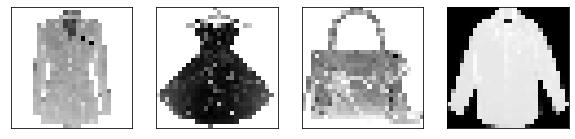

In [5]:
#importing images for testing our model
def get_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.resize(img, (28,28))

images = np.array([get_image("coat.png"),get_image("dress.png"), get_image("bag.png"), get_image("shirt.png")])
plt.figure(figsize=(10,10))

#Display  After resizing it into 28 by 28 as similar to our training dataset.

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.binary)
plt.show()

In [9]:
images_reshaped = images.reshape(images.shape[0], 28, 28, 1)
images_reshaped = tf.cast(images_reshaped, tf.float32)

In [10]:
# model and predictions
#loading our model
model = tf.keras.models.load_model("CNN_model1.h5")
preds = model.predict(images_reshaped)
print(preds)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

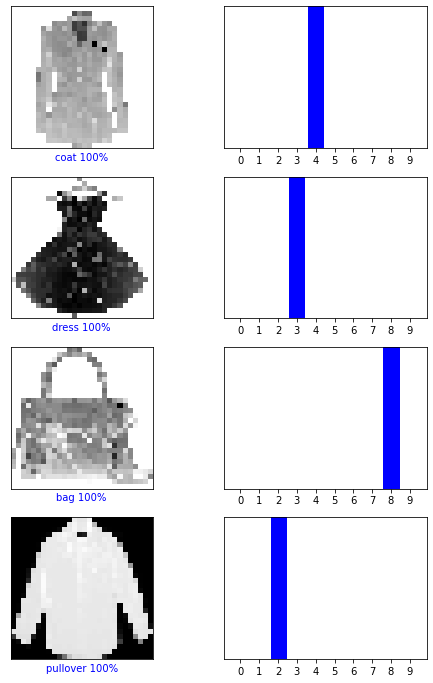

In [11]:
def plot_image(prediction, img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction)
    plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
               100*np.max(prediction),
               ),
                color="blue")
    
def plot_value_array(prediction):
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction, color="#888888")
    plt.ylim([0,1])
    predicted_label = np.argmax(prediction)
    thisplot[predicted_label].set_color('blue')
    
plt.figure(figsize=(8,12))
for i in range(4):
    # image
    plt.subplot(4, 2, 2*i+1)
    plot_image(preds[i], images[i])
    # bar chart
    plt.subplot(4, 2, 2*i+2)
    plot_value_array(preds[i])
plt.show() 